In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns

### 5-agent :

In [118]:
df_5_agents = pd.read_csv('logs/5_agents.csv')
df_5_agents.head()

,convex,n_trial,n_agents,iters,mpc_iter,obj_value,dual_res,primal_res
0,True,NaN,5,1,0,2268.506914,#NAME?,35.875022
1,True,NaN,5,2,0,2269.788449,-1.202392885,28.352100
2,True,NaN,5,3,0,2272.353659,-0.943274272,22.434205
3,True,NaN,5,4,0,2274.445389,-0.727848751,17.873298
4,True,NaN,5,5,0,2275.077562,-0.585221036,14.198333


In [119]:
convex_5_agents_df = df_5_agents.loc[df_5_agents['convex']==True]
nonconvex_5_agents_df = df_5_agents.loc[df_5_agents['convex']==False]

In [120]:
convex_5_agents_obj = convex_5_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

In [124]:
nonconvex_5_agents_obj = nonconvex_5_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

In [9]:
from matplotlib import font_manager
import matplotlib
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list
from matplotlib.font_manager import FontProperties

In [10]:
font_path = '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf'
# Create FontProperties object with the specified font file
font_prop = FontProperties(fname=font_path)

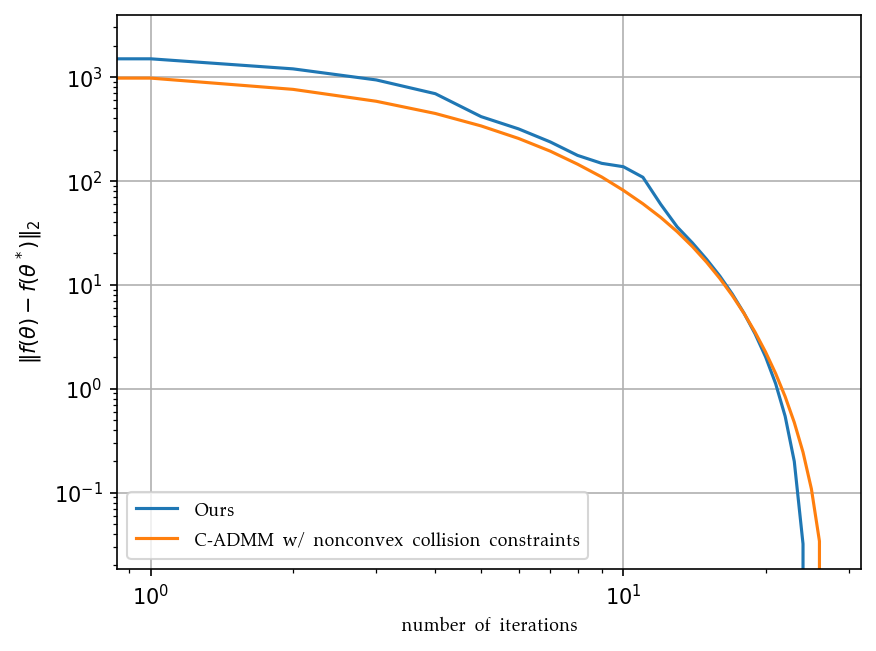

In [129]:
plt.figure(dpi=150)
plt.plot([np.linalg.norm(convex_5_agents_obj['obj_value'].values[i] - convex_5_agents_obj['obj_value'].values[-1]) for i in range(convex_5_agents_obj.shape[0])],label='Ours')
plt.plot([np.linalg.norm(nonconvex_5_agents_obj['obj_value'].values[i] - nonconvex_5_agents_obj['obj_value'].values[-1]) for i in range(nonconvex_5_agents_obj.shape[0])], label='C-ADMM w/ nonconvex collision constraints')
# plt.plot(convex_5_agents_obj['obj_value'],label='Ours')
# plt.plot(nonconvex_5_agents_obj['obj_value'] , label='C-ADMM w/ nonconvex collision constraints')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
# plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$', fontproperties=font_prop);
# plt.savefig('Convergence_comparison_5_agents.png',dpi=200)

### 3 agents:

In [48]:
df_3_agents = pd.read_csv('logs/3_agents.csv')
df_3_agents.head()

,convex,n_trial,n_agents,iters,mpc_iter,obj_value,dual_res,primal_res
0,True,NaN,3,1,0,2386.780752,12.528258,17.804450
1,True,NaN,3,2,0,2394.058757,8.099038,11.516877
2,True,NaN,3,3,0,2398.560810,5.305839,7.549537
3,True,NaN,3,4,0,2401.544034,3.486257,4.962221
4,True,NaN,3,5,0,2403.351503,2.299752,3.274020


In [51]:
convex_3_agents_df = df_3_agents.loc[df_3_agents['convex']==True]
nonconvex_3_agents_df = df_3_agents.loc[df_3_agents['convex']==False]

In [83]:
convex_residuals = convex_3_agents_df.loc[convex_3_agents_df['mpc_iter'] == 5]

In [84]:
nonconvex_residuals = nonconvex_3_agents_df.loc[nonconvex_3_agents_df['mpc_iter'] == 5]

In [78]:
# convex_3_agents_obj = convex_3_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()
# nonconvex_3_agents_obj = nonconvex_3_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

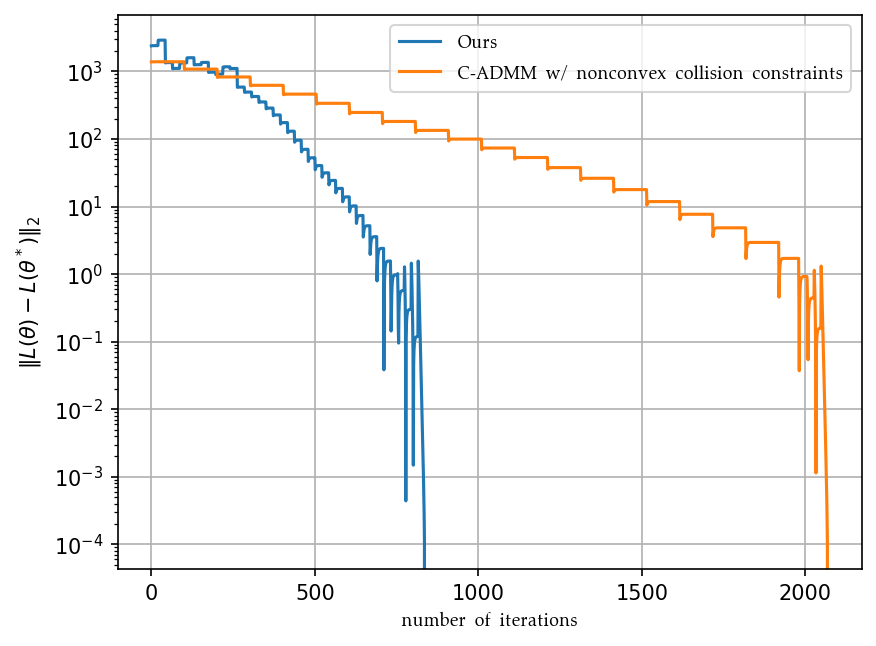

In [79]:
plt.figure(dpi=150)
plt.plot([np.linalg.norm(convex_3_agents_df['obj_value'].values[i] - convex_3_agents_df['obj_value'].values[-1]) for i in range(convex_3_agents_df.shape[0])],label='Ours')
plt.plot([np.linalg.norm(nonconvex_3_agents_df['obj_value'].values[i] - nonconvex_3_agents_df['obj_value'].values[-1]) for i in range(nonconvex_3_agents_df.shape[0])], label='C-ADMM w/ nonconvex collision constraints')
# plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
# plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.ylabel(r'$\|L(\theta) - L(\theta^*)\|_2$', fontproperties=font_prop);
plt.savefig('objective_comparison_3_agents.png',dpi=200)

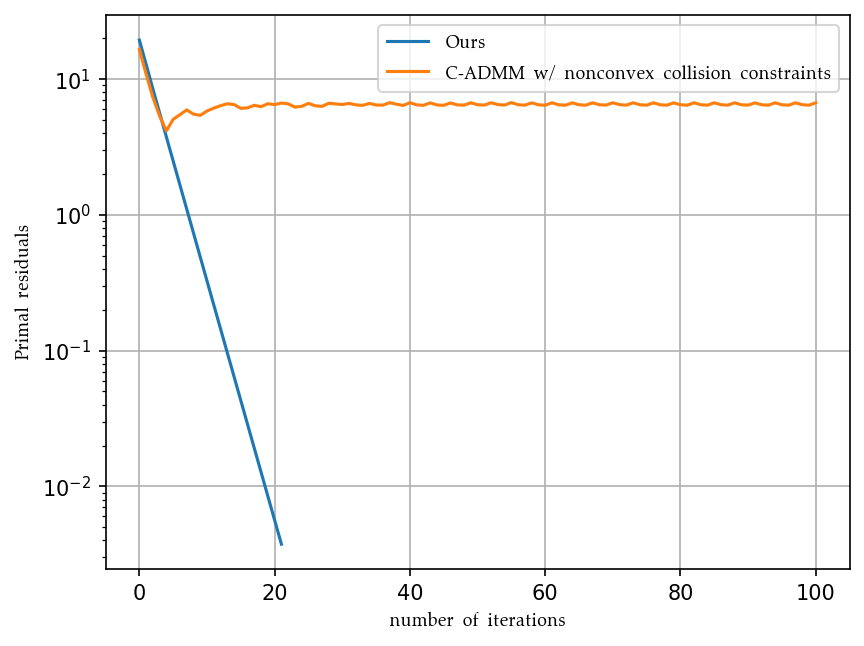

In [88]:
plt.figure(dpi=150)
# plt.plot([np.linalg.norm(convex_3_agents_df['obj_value'].values[i] - convex_3_agents_df['obj_value'].values[-1]) for i in range(convex_3_agents_df.shape[0])],label='Ours')
# plt.plot([np.linalg.norm(nonconvex_3_agents_df['obj_value'].values[i] - nonconvex_3_agents_df['obj_value'].values[-1]) for i in range(nonconvex_3_agents_df.shape[0])], label='C-ADMM w/ nonconvex collision constraints')
plt.plot(abs(convex_residuals['primal_res'].values),label='Ours')
plt.plot(abs(nonconvex_residuals['primal_res'].values),label='C-ADMM w/ nonconvex collision constraints')
# plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
# plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.ylabel('Primal residuals', fontproperties=font_prop);
plt.savefig('primal_comparison_3_agents.png',dpi=200)

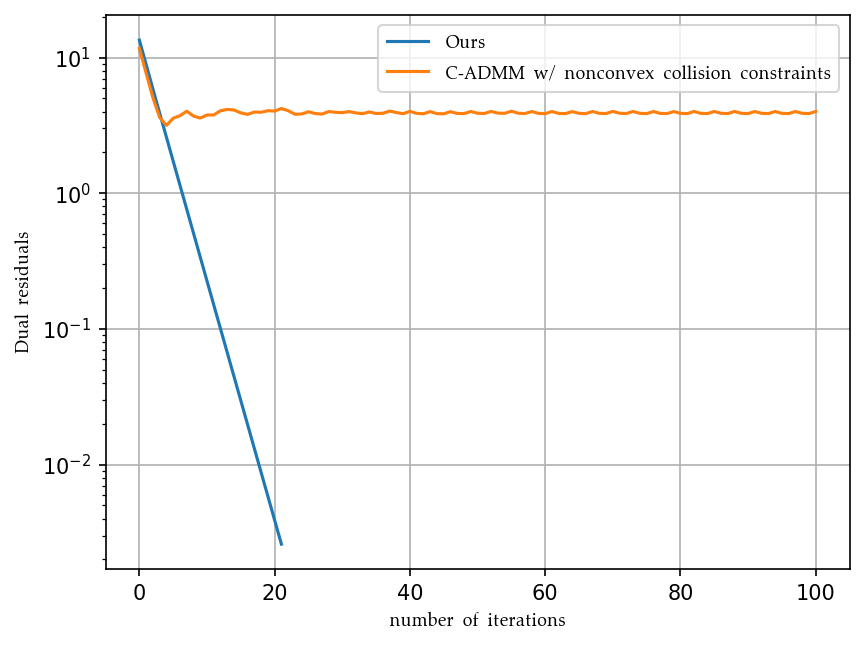

In [87]:
plt.figure(dpi=150)
# plt.plot([np.linalg.norm(convex_3_agents_df['obj_value'].values[i] - convex_3_agents_df['obj_value'].values[-1]) for i in range(convex_3_agents_df.shape[0])],label='Ours')
# plt.plot([np.linalg.norm(nonconvex_3_agents_df['obj_value'].values[i] - nonconvex_3_agents_df['obj_value'].values[-1]) for i in range(nonconvex_3_agents_df.shape[0])], label='C-ADMM w/ nonconvex collision constraints')
plt.plot([float(element) for element in convex_residuals['dual_res']],label='Ours')
plt.plot([float(element) for element in nonconvex_residuals['dual_res']],label='C-ADMM w/ nonconvex collision constraints')
# plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
# plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.ylabel('Dual residuals', fontproperties=font_prop);
plt.savefig('dual_comparison_3_agents.png',dpi=200)